# Launch Turi Create

In [1]:
import turicreate

# Load house sales data

In [7]:
sales = turicreate.SFrame('data/home_data.sframe/')

In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


# Explore

In [95]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [118]:
turicreate.show(sales[1:5000]['zipcode'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Simple regression model that predicts price from square feet

In [14]:
training_set, test_set = sales.random_split(.8,seed=0)

## train simple regression model

In [15]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.013986     | 4343498.333893     | 2671992.127424       | 263421.846632                   | 253709.755748                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the quality of our model

In [8]:
print (test_set['price'].mean())

543054.0425632538


In [27]:
print (sqft_model.evaluate(test_set))

{'max_error': 4138765.7265040632, 'rmse': 255200.00705922276}


id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0114101516,2014-05-28 00:00:00+00:00,310000.0,3.0,1.0,1430.0,19901.0,1.5,0
9297300055,2015-01-24 00:00:00+00:00,650000.0,4.0,3.0,2950.0,5000.0,2.0,0
1202000200,2014-11-03 00:00:00+00:00,233000.0,3.0,2.0,1710.0,4697.0,1.5,0
8562750320,2014-11-10 00:00:00+00:00,580500.0,3.0,2.5,2320.0,3980.0,2.0,0
7589200193,2014-11-10 00:00:00+00:00,535000.0,3.0,1.0,1090.0,3000.0,1.5,0
2078500320,2014-06-20 00:00:00+00:00,605000.0,4.0,2.5,2620.0,7553.0,2.0,0
7766200013,2014-08-11 00:00:00+00:00,775000.0,4.0,2.25,4220.0,24186.0,1.0,0
9478500640,2014-08-19 00:00:00+00:00,292500.0,4.0,2.5,2250.0,4495.0,2.0,0
9558200045,2014-08-28 00:00:00+00:00,289000.0,3.0,1.75,1260.0,8400.0,1.0,0
8820901275,2014-06-10 00:00:00+00:00,571000.0,4.0,2.0,2750.0,7807.0,1.5,0


# Explore model a little further

In [10]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-48734.130770232245,5059.182816999748
sqft_living,None,282.7959045390152,2.2194916510707277


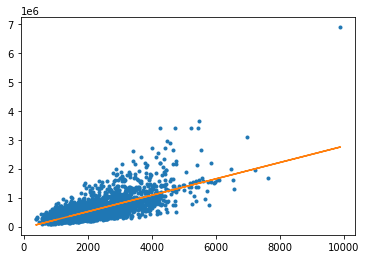

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Explore other features of the data

In [109]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [24]:
sales[my_features].show()

Materializing SFrame

In [25]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Build a model with these additional features

In [111]:

my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.028626     | 4093135.663450     | 2781599.502587       | 188522.081521                   | 202510.394394                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Compare simple model with more complex one

In [102]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [105]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 3113399.855142885, 'rmse': 155358.56867504164}


# Apply learned models to make predictions

In [40]:
house1 = sales[sales['id']=='1954400510']

In [41]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 1954400510 | 2015-02-18 00:00:00+00:00 | 510000.0 |   3.0    |    2.0    |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1680.0   |  8080.0  |  1.0   |     0      |  0   |     3     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1680.0   |      0.0      |  1987.0  |     0.0      |  98074  | 47.61681228 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.04490059 |     1800.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [42]:
print (house1['price'])

[510000.0, ... ]


In [43]:
print (sqft_model.predict(house1))

[426653.11917211604]


In [44]:
print (my_features_model.predict(house1))

[456260.6179895521]


## Prediction for a second house, a fancier one

In [46]:
house2 = sales[sales['id']=='1925069082']

In [47]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [48]:
print(house2['price'])
print (sqft_model.predict(house2))

[2200000.0, ... ]
[1262945.472009937]


In [27]:
print (my_features_model.predict(house2))

[1442070.3235753486]


## Prediction for a super fancy home

In [28]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [29]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[13491984.465966508]


### Quiz Section

In [119]:
x=sales[sales['zipcode']=='98039']['price']
print('1. Average')
print(sum(x)/len(x))
print('2. Filtering')
total_rows=sales.num_rows()
filtered_rows=sales[(sales['sqft_living']>=2000) & (sales['sqft_living']<=4000)].num_rows()
print(filtered_rows/total_rows)

1. Average
2160606.6
2. Filtering
0.4266413732475825


In [112]:
print('3. Advanced features:')
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]
print(advanced_features)

3. Advanced features:
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [122]:
advanced_features_model = turicreate.linear_regression.create(training_set,target='price',features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.036658     | 4337241.178086     | 2609119.518861       | 162039.557386                   | 169499.699248                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [123]:
print (my_features_model.evaluate(test_set))
print (advanced_features_model.evaluate(test_set))

{'max_error': 3157980.112604357, 'rmse': 180383.01389881203}
{'max_error': 3204520.0021534767, 'rmse': 155486.1577403223}


In [124]:
print('Difference in RMSE-')
print(my_features_model.evaluate(test_set)['rmse']-advanced_features_model.evaluate(test_set)['rmse'])

Difference in RMSE-
24896.85615848974
